In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-data/housingData_7R.xlsx


In [ ]:
#pd.set_option('display.max_rows', 20)

In [ ]:
!pip install openpyxl

In [ ]:
data = pd.read_excel("/kaggle/input/housing-data/housingData_7R.xlsx")

In [ ]:
df = data.copy()

In [ ]:
#data = df.copy()

In [150]:
data.head()

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,LangDetected,NumRooms,Floor,YearOfConstruction,Floor1,LivingSpace,CoordE,CoordN,Deal_Type
0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,1050.00000,fr,3.5,not available,not available,not available,80,7.21142,47.40130,rental
1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,4048.00000,de,None,EG,1992,EG,not available,8.58706,47.35843,rental
2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,1061.00000,de,3,3. Stock,not available,3. Stock,57,8.43089,47.37906,rental
3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,2250.00000,it,10,2. Stock,not available,2. Stock,190,9.03179,45.83595,rental
4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,2150000.00000,it,5.5,3. Stock,2012,3. Stock,163,8.98268,45.92414,sell


In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data = data.drop('Unnamed: 0', axis = 1)

In [ ]:
data.describe(include = "all")

In [ ]:
data['adDescription'].head()

In [ ]:
data['adDealType'].value_counts()

In [ ]:
data['Deal_Type'] = data['adDealType'].copy()

In [ ]:
target_map = {
    10: 'rental',
    20: 'sell'}

data.Deal_Type.replace(target_map, inplace = True)

In [ ]:
data['Deal_Type'].head()

In [ ]:
data.columns

In [ ]:
len(data.columns)

In [ ]:
original_col = data.columns

new_col = ['ID', 'DealType', 'Canton', 'ZipCode',
           'City','PublishedDate', 'AvailableDate', 'PriceText', 
           'Description', 'LangDetected', 'NumRooms', 'Floor', 
           'YearOfConstruction', 'NumApartments', 'Floor1', 
           'NumApartments1', 'LivingSpace', 'BuildingArea', 
           'UsefulArea', 'CoordE', 'CoordN' ,'Deal_Type']

data = data.rename(columns=dict(zip(original_col,new_col)))

data.head()

In [ ]:
# replace all column names (in place)
#new_cols = [‘column_x’, ‘column_y’, ‘column_z’]
#df.columns = new_cols

## EDA

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data['Deal_Type'])
plt.title('Target variable distribution')
plt.show()

In [ ]:
data.shape

In [ ]:
data.isnull().sum().sort_values(ascending = False)

In [ ]:
#Plot missing values in data
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

## Treating Missing Values and Outliers

In [ ]:
data.isnull().sum().sort_values(ascending=False)

In [ ]:
mis_columns = ['NumApartments', 'NumApartments1', 'BuildingArea', 'UsefulArea' ]

In [ ]:
data.corr()

In [ ]:
data['NumApartments'].head()

In [ ]:
data['NumApartments'].value_counts()

In [ ]:
mis_columns

In [ ]:
NumApartments = data['NumApartments'].copy()
BuildingArea = data['BuildingArea'].copy()
UsefulArea = data['UsefulArea'].copy()

In [ ]:
data.columns

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

#sample_outliers = detect_outliers_zscore(data['adNumApartments.1'])
#print("Outliers from Z-scores method: ", sample_outliers)

In [ ]:
sns.boxplot(data['NumApartments'])
plt.show()

In [ ]:
sns.distplot(data['NumApartments'])
plt.show()

In [ ]:
data = data.drop(columns = mis_columns, axis = 1)

In [ ]:
data.columns

In [ ]:
data.isnull().sum().any()

In [ ]:
data.isnull().sum().sort_values(ascending = False)

In [ ]:
data['City'].value_counts()

In [131]:
City = data['City'].copy()

In [ ]:
data['City'].describe()

In [ ]:
data['City'].head()

In [129]:
#Filling Null Values
data['City'].fillna('Zürich', inplace = True) #Fillna
#data['City'].ffill(axis = 0)  #ForwardFill

In [126]:
data['City'].mode()

0    Zürich
dtype: object

In [130]:
data.isnull().sum().sort_values(ascending = False)

Description           22
ID                     0
NumRooms               0
CoordN                 0
CoordE                 0
LivingSpace            0
Floor1                 0
YearOfConstruction     0
Floor                  0
LangDetected           0
DealType               0
PriceText              0
AvailableDate          0
PublishedDate          0
City                   0
ZipCode                0
Canton                 0
Deal_Type              0
dtype: int64

In [ ]:
# ptype_encode = {}
# ptype_encode_values = range(16,0,-1)
# for i,k in zip(type_count.index,ptype_encode_values):
#     ptype_encode[i]=k
# ptype_encode

# data['adCity'] = data['adCity'].map(ptype_encode)

#### **Exploring the City copied from data['City']**

In [ ]:
City.head()

In [ ]:
City = pd.DataFrame(data = City)
City.head()

In [ ]:
City.info()

In [132]:
encoder=ce.TargetEncoder(cols='City')

In [ ]:
data['City'].head()

In [ ]:
data['City'].head(20)

In [ ]:
data['City'].describe()

In [ ]:
data.describe(include = 'all')

In [ ]:
#sns.scatterplot(x = data['City'], y = data['PriceText'])
#plt.show()

## Exploring the target Column

In [ ]:
PriceText = data['PriceText'].copy()
PriceText = pd.DataFrame(data = PriceText)
PriceText.head()

In [ ]:
data['PriceText'].head()

In [ ]:
data['PriceText'] = data['PriceText'].replace(',','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'].describe()

In [ ]:
data['PriceText'].isnull().sum()

In [ ]:
data['PriceText'].value_counts()

In [ ]:
data['PriceText'] = data['PriceText'].replace('On request',np.nan)
data['PriceText'].value_counts()

In [ ]:
data['PriceText'].isnull().sum()

In [ ]:
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'].value_counts()

In [ ]:
data['PriceText'] = data['PriceText'].replace('EUR','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'].dtype

In [ ]:
data['PriceText'].value_counts()

In [ ]:
data['PriceText'] = data['PriceText'].apply(pd.to_numeric)

In [ ]:
data['PriceText'].dtype

In [ ]:
data['PriceText'].describe()

In [ ]:
sns.distplot(data['PriceText'])

In [ ]:
sns.boxplot(data['PriceText'])

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
print("Outliers from Z-scores method: ", sample_outliers)

Since, PriceText contains outliers, drop the rows

In [ ]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

In [101]:
data['PriceText'].describe()

count     555209.00000
mean      324747.62023
std       816841.63997
min            1.00000
25%         1200.00000
50%         1800.00000
75%       300000.00000
max     12923475.00000
Name: PriceText, dtype: float64

In [ ]:
sns.distplot(data['PriceText'])

In [ ]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
print("Outliers from Z-scores method: ", sample_outliers)

In [110]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

In [111]:
data["PriceText"].describe()

count    543999.00000
mean     238603.72275
std      494815.31277
min           1.00000
25%        1200.00000
50%        1780.00000
75%       79000.00000
max     2775000.00000
Name: PriceText, dtype: float64

<AxesSubplot:xlabel='PriceText'>

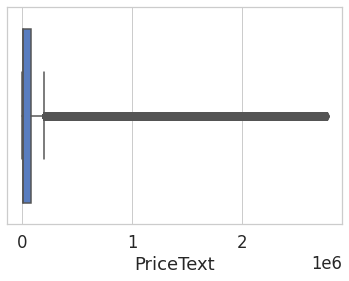

In [116]:
sns.boxplot(data['PriceText'])

Text(0.5, 0, 'Sample')

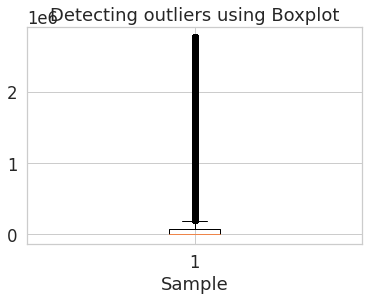

In [113]:
plt.boxplot(data["PriceText"])
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

<AxesSubplot:xlabel='PriceText', ylabel='Density'>

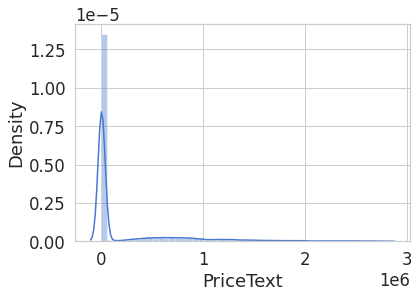

In [112]:
sns.distplot(data['PriceText'])

**Encoding the categorical column with **

In [133]:
City.shape, data['PriceText'].shape, data['City'].shape

((543999,), (543999,), (543999,))

In [134]:
#Fit and Transform Train Data
encoder.fit_transform(City,data['PriceText'])

,City
0,357957.89474
1,84965.45703
2,57866.50332
3,176773.61957
4,738950.66667
...,...
543994,605980.28986
543995,196372.46840
543996,325490.47115
543997,241577.20000


In [135]:
data.isnull().sum()

ID                     0
DealType               0
Canton                 0
ZipCode                0
City                   0
PublishedDate          0
AvailableDate          0
PriceText              0
Description           22
LangDetected           0
NumRooms               0
Floor                  0
YearOfConstruction     0
Floor1                 0
LivingSpace            0
CoordE                 0
CoordN                 0
Deal_Type              0
dtype: int64

Dropping the description for now, Will work on it later

In [136]:
Description = data['Description'].copy()

In [137]:
data = data.drop('Description', axis = 1)

In [138]:
data.describe()

,DealType,ZipCode,PriceText,CoordE,CoordN
count,543999.00000,543999.00000,543999.00000,543999.00000,543999.00000
mean,12.54065,4803.23127,238603.72275,7.85618,46.81179
std,4.35335,2819.25695,494815.31277,2.66621,0.68566
min,10.00000,1000.00000,1.00000,0.00000,-141.54182
25%,10.00000,1802.00000,1200.00000,7.05704,46.46967
50%,10.00000,6003.00000,1780.00000,7.98149,46.86528
75%,20.00000,6992.00000,79000.00000,8.64974,47.26765
max,20.00000,8967.00000,2775000.00000,1078.51760,47.69496


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543999 entries, 0 to 543998
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  543999 non-null  object 
 1   DealType            543999 non-null  int64  
 2   Canton              543999 non-null  object 
 3   ZipCode             543999 non-null  float64
 4   City                543999 non-null  object 
 5   PublishedDate       543999 non-null  object 
 6   AvailableDate       543999 non-null  object 
 7   PriceText           543999 non-null  float64
 8   LangDetected        543999 non-null  object 
 9   NumRooms            543999 non-null  object 
 10  Floor               543999 non-null  object 
 11  YearOfConstruction  543999 non-null  object 
 12  Floor1              543999 non-null  object 
 13  LivingSpace         543999 non-null  object 
 14  CoordE              543999 non-null  float64
 15  CoordN              543999 non-nul

In [105]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

In [140]:
data.shape

(543999, 17)

### Canton

In [141]:
data['Canton'].head()

0    JU
1    ZH
2    ZH
3    TI
4    TI
Name: Canton, dtype: object

In [142]:
data['Canton'].value_counts()

ZH    136333
VD    121857
BE     96826
TI     96795
FR     42471
LU     39679
JU     10038
Name: Canton, dtype: int64

In [144]:
#Run it at the later end because it will add to the number of columns and there is still plenty of work to do
#data = pd.get_dummies(data = data['Canton'], drop_first = True)

### ZipCode

In [145]:
data.ZipCode.head()

0   2954.00000
1   8053.00000
2   8902.00000
3   6830.00000
4   6818.00000
Name: ZipCode, dtype: float64

In [146]:
data.ZipCode.value_counts()

6900.00000    19108
1700.00000     7260
8400.00000     4989
1630.00000     4375
1004.00000     4244
              ...  
6904.00000        1
3003.00000        1
4543.00000        1
8522.00000        1
1313.00000        1
Name: ZipCode, Length: 1721, dtype: int64

Is this column really relevant to the model????

In [147]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type'],
      dtype='object')

## Date_Columns

In [148]:
date_col = ['PublishedDate', 'AvailableDate']

In [149]:
data[date_col].head()

,PublishedDate,AvailableDate
0,2020-12-16,not available
1,2020-11-19,nach Vereinbarung
2,2021-01-20,sofort
3,2020-10-16,sofort
4,2020-07-17,sofort


In [151]:
data['AvailableDate'].value_counts()

nach Vereinbarung    215027
sofort                83407
By arrangement        57508
Immediately           18634
not available         17195
                      ...  
01.06.2026                1
01.11.2026                1
14.06.2022                1
01.05.2045                1
23.04.2022                1
Name: AvailableDate, Length: 692, dtype: int64

## Things to try out

* **data = data.sort_values(by=['adPublishedDate']).reset_index(drop=True)**
* Trying to sort the data by dates... 'adPublishedDate', 'adAvailableDate'
* How many days is between the published date and available date
* Extract days and month from the date columns

In [ ]:
#Remember this for some visualization
count_plot = sns.catplot(x="adNumApartments.1", kind="count" ,data=data, hue="DealType")
#plt.hist(data['adNumApartments.1'])
plt.show()